In [182]:
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt

In [183]:
def parse_file(filename):
    dev_accuracy = []
    test_accuracy = []
    train_accuracy = []
    breakdown = []
    excecution = []
    with open(filename,"r+") as f:
        data = f.readlines()
        for line in data:
            line.strip()
#             print(line)
            if line.find("Dev acc_qm:") >= 0:
                dev_accuracy.append(line.split("Dev acc_qm:")[1].strip())
            if line.find("Train acc_qm:") >= 0:
                train_accuracy.append(line.split("Train acc_qm:")[1].strip())
            if line.find("Test acc_qm:") >= 0:
                test_accuracy.append(line.split("Test acc_qm:")[1].strip().strip(")"))
            if line.find("Best val acc =") >= 0:
                temp = line.split("Best val acc = (")[1].strip()
                breakdown.append([i.strip().strip(")") for i in temp.split(",")[:3]])
            if line.find("Dev execution acc:") >= 0:
                excecution.append(line.split("Dev execution acc:")[1].strip().strip(")"))
                
                
    dev_accuracy = pd.Series(dev_accuracy[:-1]).apply(lambda x: float(x)).to_frame().reset_index()\
    .rename(columns={"index":"epochs", 0: "accuracy"})
    dev_accuracy["epochs"] = dev_accuracy["epochs"] + 1 
    
    test_accuracy = [ i[:-1] for i in test_accuracy]
    execution = [ i[:-1] for i in excecution]
    
    train_accuracy = pd.Series(train_accuracy).apply(lambda x: float(x)).to_frame().reset_index()\
    .rename(columns={"index":"epochs", 0: "accuracy"})
    train_accuracy["epochs"] = train_accuracy["epochs"] + 1
    
    breakdown = pd.DataFrame(breakdown).reset_index()\
    .rename(columns={"index":"epochs", 0: "agg", 1:"sel", 2:"where"})
    breakdown["epochs"] = breakdown["epochs"] + 1
    return dev_accuracy,train_accuracy,float(test_accuracy[0]),breakdown, execution

In [184]:
dev_baseline,train_baseline,test_baseline,breakdown_baseline, ex_bl = parse_file("baseline_20_epochs.txt")
dev_bert,train_bert,test_bert,breakdown_bert, ex_bert = parse_file("bert_all_epochs.txt")
dev_bidaf,train_bidaf,test_bidaf,breakdown_bidaf, ex_bidaf = parse_file("BIDAF_FINAL_results.txt")
dev_ws,train_ws,test_ws,breakdown_ws, ex_ws = parse_file("modified_weight_sharing_20_epochs.txt")

In [185]:
dicti = [
    { "Model": "Baseline", "Accuracy":test_baseline},
    { "Model": "BERT", "Accuracy":test_bert},
    { "Model": "BiDAF", "Accuracy":test_bidaf},
    { "Model": "Weight_Sharing", "Accuracy":test_ws}
]
dicti_ex = [
    { "Model": "Baseline", "Accuracy":ex_bl},
    { "Model": "BERT", "Accuracy":ex_bert},
    { "Model": "BiDAF", "Accuracy":ex_bidaf},
    { "Model": "Weight_Sharing", "Accuracy":ex_ws}
]
test = pd.DataFrame(dicti)
exce = pd.DataFrame(dicti_ex)

In [186]:
dev_baseline["Model"] = "Baseline" 
dev_bert["Model"] = "BERT" 
dev_bidaf["Model"] = "BiDAF" 
dev_ws["Model"] = "Weight_Sharing" 
dev_accuracy = pd.concat([dev_baseline,dev_bert, dev_bidaf,dev_ws])

In [187]:
train_baseline["Model"] = "Baseline" 
train_bert["Model"] = "BERT" 
train_bidaf["Model"] = "BiDAF" 
train_ws["Model"] = "Weight_Sharing" 
train_accuracy = pd.concat([train_baseline,train_bert, train_bidaf,train_ws])

In [188]:
breakdown_baseline["Model"] = "Baseline" 
breakdown_bert["Model"] = "BERT" 
breakdown_bidaf["Model"] = "BiDAF" 
breakdown_ws["Model"] = "Weight_Sharing" 
breakdown_accuracy = pd.concat([breakdown_baseline,breakdown_bert, breakdown_bidaf,breakdown_ws])
breakdown_accuracy["where"] = breakdown_accuracy["where"].astype("float")
breakdown_accuracy["agg"] = breakdown_accuracy["agg"].astype("float")
breakdown_accuracy["sel"] = breakdown_accuracy["sel"].astype("float")

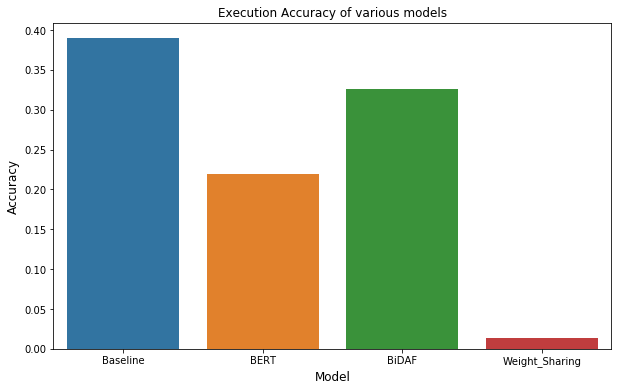

In [189]:
plt.figure(figsize=(10,6))
sea.barplot(x="Model", y="Accuracy", data=test)
plt.ylabel("Accuracy",fontsize=12)
plt.xlabel("Model",fontsize=12)
plt.title("Execution Accuracy of various models",fontsize=12)
plt.savefig("Execution_Accuracy.png")
plt.show()

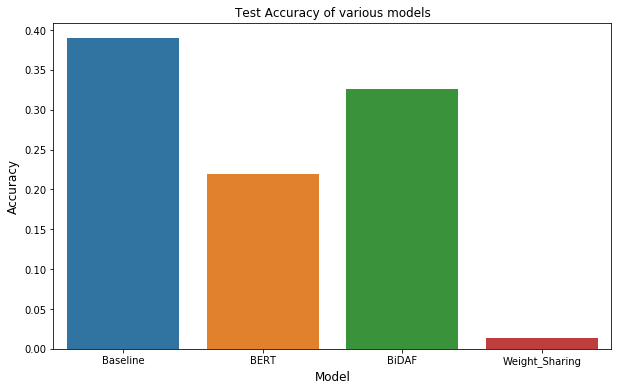

In [190]:
plt.figure(figsize=(10,6))
sea.barplot(x="Model", y="Accuracy", data=test)
plt.ylabel("Accuracy",fontsize=12)
plt.xlabel("Model",fontsize=12)
plt.title("Test Accuracy of various models",fontsize=12)
plt.savefig("Test_Accuracy.png")
plt.show()

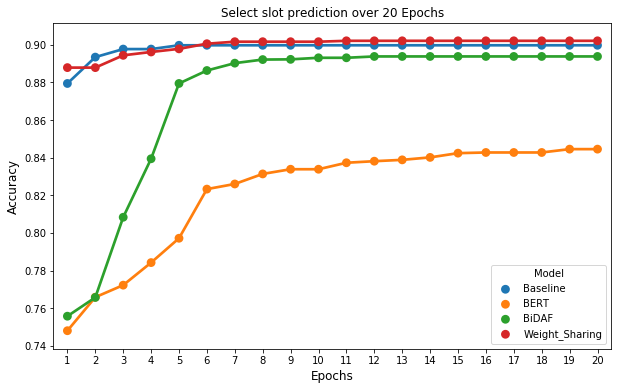

In [191]:
plt.figure(figsize=(10,6))
sea.pointplot(x="epochs", y="agg",hue="Model", data=breakdown_accuracy)
plt.ylabel("Accuracy",fontsize=12)
plt.xlabel("Epochs",fontsize=12)
plt.title("Select slot prediction over 20 Epochs",fontsize=12)
plt.savefig("Sel_Accuracy.png")
plt.show()

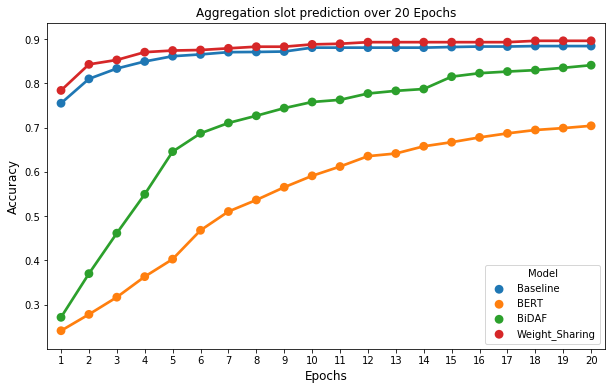

In [192]:
plt.figure(figsize=(10,6))
sea.pointplot(x="epochs", y="sel",hue="Model", data=breakdown_accuracy)
plt.ylabel("Accuracy",fontsize=12)
plt.xlabel("Epochs",fontsize=12)
plt.title("Aggregation slot prediction over 20 Epochs",fontsize=12)
plt.savefig("Agg_Accuracy.png")
plt.show()

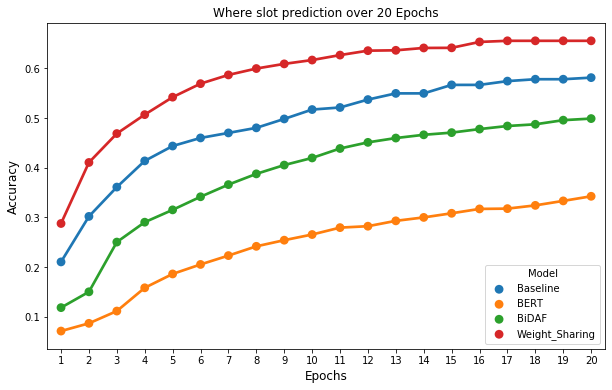

In [193]:
plt.figure(figsize=(10,6))
sea.pointplot(x="epochs", y="where",hue="Model", data=breakdown_accuracy)
plt.ylabel("Accuracy",fontsize=12)
plt.xlabel("Epochs",fontsize=12)
plt.title("Where slot prediction over 20 Epochs",fontsize=12)
plt.savefig("Where_Accuracy.png")
plt.show()

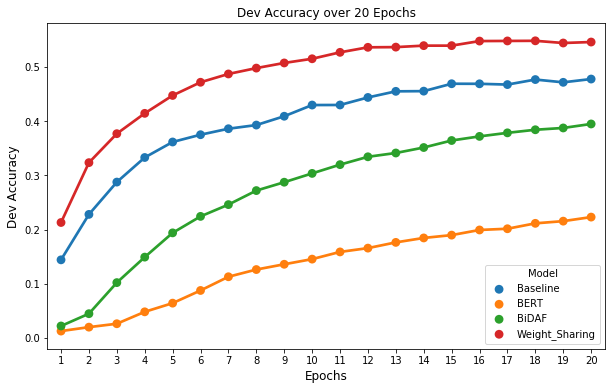

In [194]:
plt.figure(figsize=(10,6))
sea.pointplot(x="epochs", y="accuracy",hue="Model", data=dev_accuracy)
plt.ylabel("Dev Accuracy",fontsize=12)
plt.xlabel("Epochs",fontsize=12)
plt.title("Dev Accuracy over 20 Epochs",fontsize=12)
plt.savefig("Dev_Accuracy.png")
plt.show()

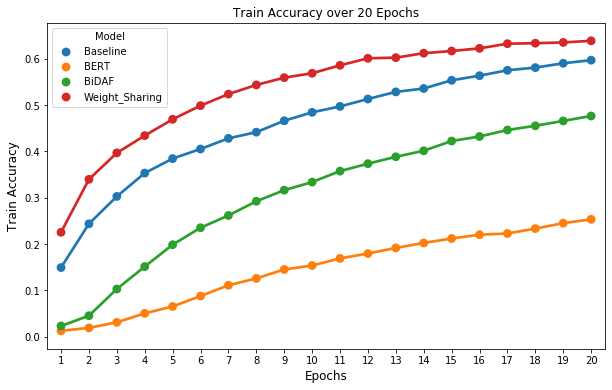

In [195]:
plt.figure(figsize=(10,6))
sea.pointplot(x="epochs", y="accuracy",hue="Model", data=train_accuracy)
plt.ylabel("Train Accuracy",fontsize=12)
plt.xlabel("Epochs",fontsize=12)
plt.title("Train Accuracy over 20 Epochs",fontsize=12)
plt.savefig("Train_Accuracy.png")
plt.show()